### Stochastic Gradient Descent vs Batch Gradient Descnet vs Mini Batch Gradient Descent 

**In Batch Gradient Descnet**
1. We go through all training samples and calculate cumulative error 
2. then we back propagate and adjust weights 
3. this approach is good for small dataset 

**Stochastic Gradient Descnet**
1. use one (randomly picked) sample for forward pass and then adjust weights 
2. this approach is good when training data is very big and we don't want too much of computation 

**Mini Batch Gradient Descent**
1. use a bactch of (randomly picked) samples for forward pass and then adjust weights

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline 

In [3]:
df = pd.read_csv('homeprices_banglore.csv') 
df.sample(10) 

,area,bedrooms,price
14,2250,3,101.00
6,2732,4,135.00
1,2600,4,120.00
0,1056,2,39.07
11,2785,4,140.00
9,3700,5,167.00
13,1100,2,40.00
2,1440,3,62.00
16,1180,3,48.00
7,3300,4,155.00


In [4]:
df.shape 

(20, 3)

In [5]:
X = df.drop('price', axis=1)
y = df.price 

In [7]:
X.head() 

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2


In [8]:
y.head() 

0     39.07
1    120.00
2     62.00
3     75.00
4     51.00
Name: price, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler 

sx = MinMaxScaler() 
sy = MinMaxScaler()  

scaled_X = sx.fit_transform(X) 
scaled_y = sy.fit_transform(y.values.reshape(df.shape[0],1)) 

In [ ]:
y.shape 

(20,)

In [14]:
scaled_X.shape 

(20, 2)

In [13]:
scaled_y.shape

(20, 1)

#### Batch Gradient Descent

In [18]:
w=np.ones(shape=(2))
w

array([1., 1.])

In [ ]:
# convert raws to columns 
scaled_X.T, scaled_X.T.shape, scaled_X.shape 

(array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
         0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
         0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
         0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
        [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
         0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
         0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
         0.25      , 0.5       , 0.5       , 0.5       , 0.        ]]),
 (2, 20),
 (20, 2))

In [27]:
np.ones(shape=(2))  

array([1., 1.])

In [31]:
def batch_gradient_descent(X, y_true, epocs, learning_rate = 0.01): 
    number_of_features = X.shape[1] 
    
    y_true = y_true.reshape(y_true.shape[0],)
    
    w = np.ones(shape=(number_of_features))
    b = 0 
    total_samples = X.shape[0] 
    
    cost_list = []
    epoch_list = [] 
    
    for i in range(epocs): 
        y_predicted = np.dot(w, X.T) + b   
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted) 
        
        w = w - learning_rate * w_grad 
        b = b - learning_rate * b_grad 
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost) 
            epoch_list.append(i) 
    return w,b,cost,cost_list,epoch_list

In [32]:
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X, scaled_y, 500) 
w, b, cost 

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

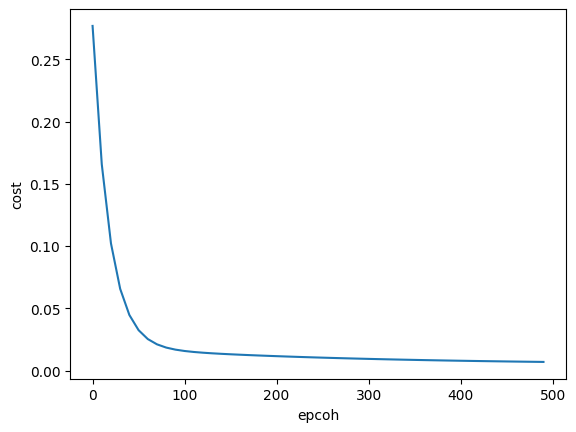

In [33]:
# plotting cost against epoch
plt.xlabel('epcoh')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list) 

In [36]:
sx.transform([[2600, 75]])[0]

c:\Users\madhu\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([ 0.62068966, 18.5       ])

In [41]:
def predict(area, bedrooms, w, b): 
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    price = sy.inverse_transform([[scaled_price]])[0][0]
    print(f'Home price: {price}')  

In [42]:
predict(2600, 4, w, b) 

Home price: 128.45484403267596


c:\Users\madhu\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [43]:
predict(10000, 10, w,b) 

Home price: 508.64655812694923


c:\Users\madhu\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Stochastic Gradient Descent 

In [44]:
import random 
random.randint(0,6) 

2

In [52]:
scaled_X[3] 

array([0.24862069, 0.5       ])

In [ ]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01): 
    number_of_features = X.shape[1]
    
    y_true = y_true.reshape(y_true.shape[0], ) 
    
    w = np.ones(shape=(number_of_features))
    b = 0 
    total_samples = X.shape[0] 
    
    cost_list = []
    epoch_list = [] 
    
    for i in range(epochs): 
        random_index = random.randint(0, total_samples-1) 
        sample_X = X[random_index]
        sample_y = y_true[random_index] 
        
        # calculate y_predicted using dot product
        # transpose the Xj to get the dot product because w.shape = (1,2)
        y_predicted = np.dot(w, sample_X.T) + b  
        
        w_grad = -(2/total_samples)*(sample_X.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        # get gradients of w, and b
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad 
        
        cost = np.square(sample_y-y_predicted) 
        
        if i%100==0: 
            cost_list.append(cost)
            epoch_list.append(i) 
    
    return w, b, cost, cost_list, epoch_list 

In [59]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y, 10000) 

w_sgd, b_sgd, cost_sgd 

(array([0.70816441, 0.67689717]), -0.2319265596939902, 0.006544806123082721)

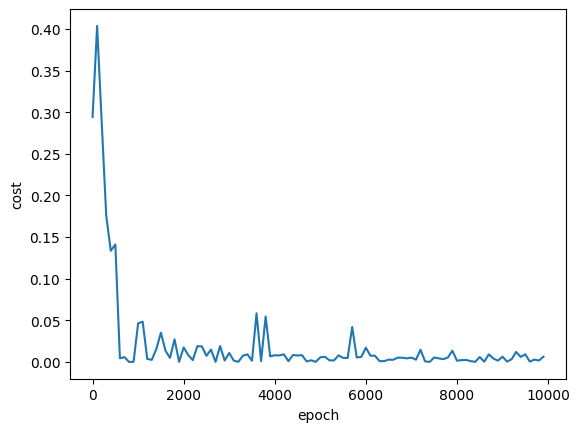

In [60]:
# plotting epochs against cost
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)  

In [ ]:
# using sgd
predict(2600, 4, w_sgd, b_sgd)

Home price: 128.56504591693545


c:\Users\madhu\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# using bgd
predict(2600, 4, w, b)

Home price: 128.45484403267596


c:\Users\madhu\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Mini Batch Gradient Descnet

In [66]:
scaled_y.reshape(scaled_y.shape[0], ).shape 

(20,)

In [ ]:
def minibatch_gradient_descent(X, y_true, epochs, batch_size, learning_rate=0.01): 
    number_of_features = X.shape[1] 
    
    # reshape the array to look like (20,) from (20,1)
    y_true = y_true.reshape(y_true.shape[0],)
    
    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0] 
    
    # check the batch size
    if batch_size > total_samples: 
        batch_size = total_samples
    
    cost_list = []
    epoch_list = [] 
    
    num_batches = int(total_samples/batch_size) 
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices] 
        y_tmp = y_true[random_indices] 
        
        for j in range(0, total_samples, batch_size): 
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            
            # calculate y_predicted using dot product
            # transpose the Xj to get the dot product because w.shape = (1,2)
            y_predicted = np.dot(w, Xj.T) + b 
            
            # get gradients of w, and b
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted) 
            
            # calculate the w, b
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad 
            
            # calculate the cost using MSE 
            cost = np.mean(np.square(yj-y_predicted))  # MSE (Mean Squared Error)
        
        # append the data to the lists after 10 epochs    
        if i%10==0: 
            cost_list.append(cost)
            epoch_list.append(i) 
        
    return w, b, cost, cost_list, epoch_list 

In [69]:
w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = minibatch_gradient_descent(scaled_X, scaled_y, epochs=100, batch_size=5)  
w_mb, b_mb, cost_mb

(array([0.72455808, 0.69443097]), -0.24768409752085885, 0.004032889346359491)

In [70]:
predict(2600, 4, w_mb, b_mb) 

Home price: 129.58675221942977


c:\Users\madhu\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [71]:
predict(2600, 4, w, b) 

Home price: 128.45484403267596


c:\Users\madhu\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


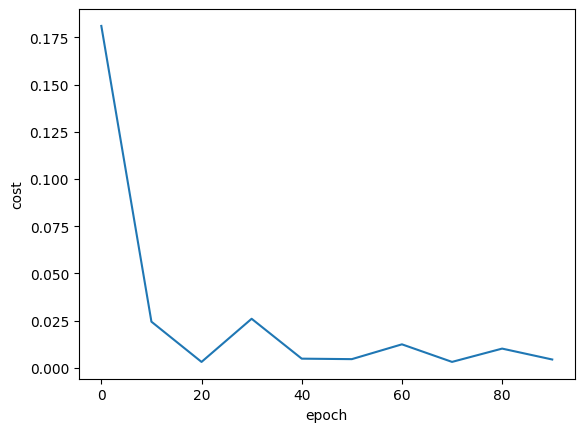

In [73]:
# plotting epoch against cost 
plt.xlabel('epoch')
plt.ylabel('cost') 
plt.plot(epoch_list_mb, cost_list_mb)  